# Verion1

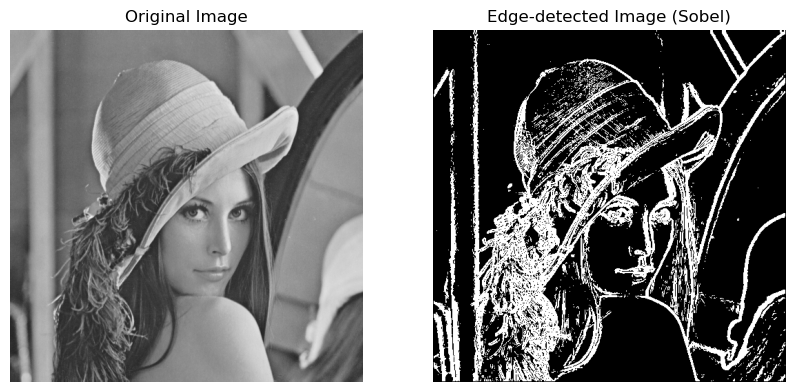

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_edge_detector(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Convert the image to float32 for accurate gradient calculation
    image = image.astype(np.float32)

    # Sobel kernels for x and y directions
    sobel_x_kernel = np.array([[-1, 0, 1],
                                [-2, 0, 2],
                                [-1, 0, 1]])

    sobel_y_kernel = np.array([[-1, -2, -1],
                                [0, 0, 0],
                                [1, 2, 1]])

    # Initialize output arrays for gradient components
    sobel_x = np.zeros_like(image)
    sobel_y = np.zeros_like(image)

    # Apply Sobel operator using manual convolution
    height, width = image.shape
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            # Compute gradient in x direction
            gradient_x = np.sum(image[y-1:y+2, x-1:x+2] * sobel_x_kernel)
            sobel_x[y, x] = gradient_x

            # Compute gradient in y direction
            gradient_y = np.sum(image[y-1:y+2, x-1:x+2] * sobel_y_kernel)
            sobel_y[y, x] = gradient_y

    # Calculate gradient magnitude
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    
    # Apply a threshold to identify edges
    threshold = 50
    edges = (magnitude > threshold).astype(np.uint8) * 255

    return edges

# Example usage
image_path = 'lena_gray.bmp'
edge_image = sobel_edge_detector(image_path)

# Display the original and edge-detected images
original_image = cv2.imread(image_path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Plotting the images using matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')

# Edge-detected Image
plt.subplot(1, 2, 2)
plt.imshow(edge_image, cmap='gray')
plt.title('Edge-detected Image (Sobel)')
plt.axis('off')

# Display the images
plt.show()


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Example usage
image_path = 'lena_gray.bmp'

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

height, width = image.shape
print(height,width)

512 512
